# Forecasting with Facebook's Prophet (using exogenous variable)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2_wddkxc/sw_1hq26.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2_wddkxc/oy2gkoby.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96162', 'data', 'file=/tmp/tmp2_wddkxc/sw_1hq26.json', 'init=/tmp/tmp2_wddkxc/oy2gkoby.json', 'output', 'file=/tmp/tmp2_wddkxc/prophet_model64wxetru/prophet_model-20240715042716.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:27:16 - cmdstanpy - INFO - Chain [1] start processing
IN

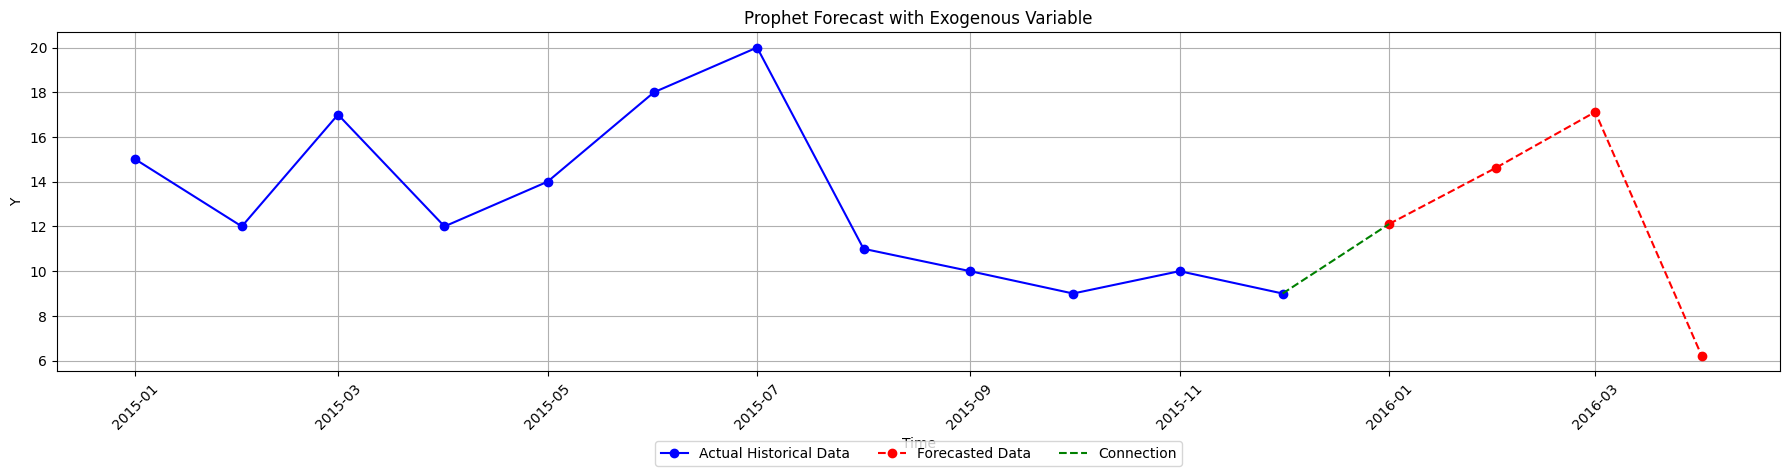


Forecasted values (Y_hat) for the future:
          ds       yhat
0 2016-01-01  12.108556
1 2016-02-01  14.613139
2 2016-03-01  17.118332
3 2016-04-01   6.214698


In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

# Define your data
data = {
    'Time': ['Jan-2015', 'Feb-2015', 'Mar-2015', 'Apr-2015', 'May-2015', 'Jun-2015', 'Jul-2015', 'Aug-2015',
             'Sep-2015', 'Oct-2015', 'Nov-2015', 'Dec-2015', 'Jan-2016', 'Feb-2016', 'Mar-2016', 'Apr-2016'],
    'Y': [15, 12, 17, 12, 14, 18, 20, 11, 10, 9, 10, 9, None, None, None, None],
    'X': [1800, 1000, 1800, 1500, 1100, 1800, 1700, 1200, 1000, 900, 1000, 900, 1200, 1500, 1800, 500]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Forward fill missing values in 'Y'
df['Y'] = df['Y'].fillna(method='ffill')

# Correctly parse 'Time' to datetime format (Month-Year)
df['Time'] = pd.to_datetime(df['Time'], format='%b-%Y', errors='coerce')

# Prepare data for Prophet (Prophet expects 'ds' and 'y' columns)
prophet_data = df.rename(columns={'Time': 'ds', 'Y': 'y'})

# Separate historical and future data
historical = prophet_data[prophet_data['ds'] < '2016-01-01']
future = prophet_data[prophet_data['ds'] >= '2016-01-01'].copy()

# Initialize Prophet model
model = Prophet()

# Optionally add regressors (exogenous variables)
model.add_regressor('X')

# Fit the model using historical data
model.fit(historical)

# Create future dates for forecasting
future_dates = future.drop(columns=['y'])  # Drop 'y' to avoid 'ValueError: Found columns without data but no columns expected'
future_forecast = model.predict(future_dates)

# Plotting only actual historical data and connecting with forecasted values
plt.figure(figsize=(18, 5))

# Plot actual historical data
plt.plot(historical['ds'], historical['y'], marker='o', linestyle='-', color='b', label='Actual Historical Data')

# Plot forecasted data points
plt.plot(future['ds'], future_forecast['yhat'], marker='o', linestyle='--', color='r', label='Forecasted Data')

# Connect the last known actual point with the first forecasted value
plt.plot([historical['ds'].iloc[-1], future['ds'].iloc[0]],
         [historical['y'].iloc[-1], future_forecast['yhat'].iloc[0]],
         linestyle='--', color='g', label='Connection')

plt.title('Prophet Forecast with Exogenous Variable')
plt.xlabel('Time')
plt.ylabel('Y')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the forecasted values
print("\nForecasted values (Y_hat) for the future:")
print(future_forecast[['ds', 'yhat']])


# Getting êt+1

In [2]:
import pandas as pd
from prophet import Prophet
import numpy as np

# Define your data
data = {
    'Time': ['Jan-2015', 'Feb-2015', 'Mar-2015', 'Apr-2015', 'May-2015', 'Jun-2015', 'Jul-2015', 'Aug-2015',
             'Sep-2015', 'Oct-2015', 'Nov-2015', 'Dec-2015', 'Jan-2016', 'Feb-2016', 'Mar-2016', 'Apr-2016'],
    'Y': [15, 12, 17, 12, 14, 18, 20, 11, 10, 9, 10, 9, None, None, None, None],
    'X': [1800, 1000, 1800, 1500, 1100, 1800, 1700, 1200, 1000, 900, 1000, 900, 1200, 1500, 1800, 500]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Forward fill missing values in 'Y'
df['Y'] = df['Y'].fillna(method='ffill')

# Correctly parse 'Time' to datetime format (Month-Year)
df['Time'] = pd.to_datetime(df['Time'], format='%b-%Y', errors='coerce')

# Prepare data for Prophet
prophet_data = df.rename(columns={'Time': 'ds', 'Y': 'y'})

# Separate historical and future data
historical = prophet_data[prophet_data['ds'] < '2016-01-01']
future = prophet_data[prophet_data['ds'] >= '2016-01-01'].copy()

# Initialize Prophet model
model = Prophet()

# Add regressor (exogenous variable)
model.add_regressor('X')

# Fit the model using historical data
model.fit(historical)

# Create future dates for forecasting
future_dates = future.drop(columns=['y'])  # Drop 'y' to avoid 'ValueError: Found columns without data but no columns expected'
future_forecast = model.predict(future_dates)

# Extract and display the forecasted values (yhat) for the future
forecasted_values = future_forecast[['ds', 'yhat']]
forecasted_values.rename(columns={'yhat': 'Y_hat'}, inplace=True)  # Rename yhat to Y_hat for clarity

# Calculate one-step ahead forecast errors (hat_e)
forecasted_values['Y'] = future['y'].values  # Actual values (Y)
forecasted_values['hat_e'] = forecasted_values['Y'] - forecasted_values['Y_hat']  # Forecast errors (hat_e)

print("\nForecasted values (Y_hat) and one-step ahead forecast errors (hat_e) for the future:")
print(forecasted_values[['ds', 'Y_hat', 'Y', 'hat_e']])


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2_wddkxc/iwgb_65l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2_wddkxc/4eqss2t1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34354', 'data', 'file=/tmp/tmp2_wddkxc/iwgb_65l.json', 'init=/tmp/tmp2_wddkxc/4eqss2t1.json', 'output', 'file=/tmp/tmp2_wddkxc/prophet_modeleg7bu59k/prophet_model-20240715042937.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:29:37 - cmdstanpy - INFO - Chain [1] start processing
IN


Forecasted values (Y_hat) and one-step ahead forecast errors (hat_e) for the future:
          ds      Y_hat    Y     hat_e
0 2016-01-01  12.108556  9.0 -3.108556
1 2016-02-01  14.613139  9.0 -5.613139
2 2016-03-01  17.118332  9.0 -8.118332
3 2016-04-01   6.214698  9.0  2.785302


<ipython-input-2-03d9e85df581>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_values.rename(columns={'yhat': 'Y_hat'}, inplace=True)  # Rename yhat to Y_hat for clarity
<ipython-input-2-03d9e85df581>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_values['Y'] = future['y'].values  # Actual values (Y)
<ipython-input-2-03d9e85df581>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [3]:
import pandas as pd
from prophet import Prophet
import numpy as np

# Define your data
data = {
    'Time': ['Jan-2015', 'Feb-2015', 'Mar-2015', 'Apr-2015', 'May-2015', 'Jun-2015', 'Jul-2015', 'Aug-2015',
             'Sep-2015', 'Oct-2015', 'Nov-2015', 'Dec-2015', 'Jan-2016', 'Feb-2016', 'Mar-2016', 'Apr-2016'],
    'Y': [15, 12, 17, 12, 14, 18, 20, 11, 10, 9, 10, 9, None, None, None, None],
    'X': [1800, 1000, 1800, 1500, 1100, 1800, 1700, 1200, 1000, 900, 1000, 900, 1200, 1500, 1800, 500]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Forward fill missing values in 'Y'
df['Y'] = df['Y'].fillna(method='ffill')

# Correctly parse 'Time' to datetime format (Month-Year)
df['Time'] = pd.to_datetime(df['Time'], format='%b-%Y', errors='coerce')

# Prepare data for Prophet
prophet_data = df.rename(columns={'Time': 'ds', 'Y': 'y'})

# Separate historical and future data
historical = prophet_data[prophet_data['ds'] < '2016-01-01']
future = prophet_data[prophet_data['ds'] >= '2016-01-01'].copy()

# Initialize Prophet model with uncertainty intervals (95% by default)
model = Prophet(interval_width=0.95)

# Add regressor (exogenous variable)
model.add_regressor('X')

# Fit the model using historical data
model.fit(historical)

# Create future dates for forecasting
future_dates = future.drop(columns=['y'])  # Drop 'y' to avoid 'ValueError: Found columns without data but no columns expected'
future_forecast = model.predict(future_dates)

# Extract and display the forecasted values (yhat) and uncertainty intervals (yhat_lower, yhat_upper) for the future
forecasted_values = future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecasted_values.rename(columns={'yhat': 'Y_hat', 'yhat_lower': 'Lower_CI', 'yhat_upper': 'Upper_CI'}, inplace=True)

# Calculate one-step ahead forecast errors (hat_e)
forecasted_values['Y'] = future['y'].values  # Actual values (Y)
forecasted_values['hat_e'] = forecasted_values['Y'] - forecasted_values['Y_hat']  # Forecast errors (hat_e)

print("\nForecasted values (Y_hat) and uncertainty intervals (95% CI) for the future:")
print(forecasted_values[['ds', 'Y_hat', 'Lower_CI', 'Upper_CI', 'Y', 'hat_e']])


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2_wddkxc/1eo6ffvn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2_wddkxc/eyz9vrv0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35764', 'data', 'file=/tmp/tmp2_wddkxc/1eo6ffvn.json', 'init=/tmp/tmp2_wddkxc/eyz9vrv0.json', 'output', 'file=/tmp/tmp2_wddkxc/prophet_modelez4pkrot/prophet_model-20240715043317.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:33:17 - cmdstanpy - INFO - Chain [1] start processing
IN


Forecasted values (Y_hat) and uncertainty intervals (95% CI) for the future:
          ds      Y_hat   Lower_CI   Upper_CI    Y     hat_e
0 2016-01-01  12.108556   8.830363  15.601831  9.0 -3.108556
1 2016-02-01  14.613139  10.979659  18.004905  9.0 -5.613139
2 2016-03-01  17.118332  13.631032  20.404287  9.0 -8.118332
3 2016-04-01   6.214698   2.522423   9.494851  9.0  2.785302


<ipython-input-3-af2651744b1e>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_values.rename(columns={'yhat': 'Y_hat', 'yhat_lower': 'Lower_CI', 'yhat_upper': 'Upper_CI'}, inplace=True)
<ipython-input-3-af2651744b1e>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_values['Y'] = future['y'].values  # Actual values (Y)
<ipython-input-3-af2651744b1e>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2_wddkxc/gdw0e22j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2_wddkxc/staferqq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71567', 'data', 'file=/tmp/tmp2_wddkxc/gdw0e22j.json', 'init=/tmp/tmp2_wddkxc/staferqq.json', 'output', 'file=/tmp/tmp2_wddkxc/prophet_modelnzvgp7i3/prophet_model-20240715043927.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:39:27 - cmdstanpy - INFO - Chain [1] start processing
IN

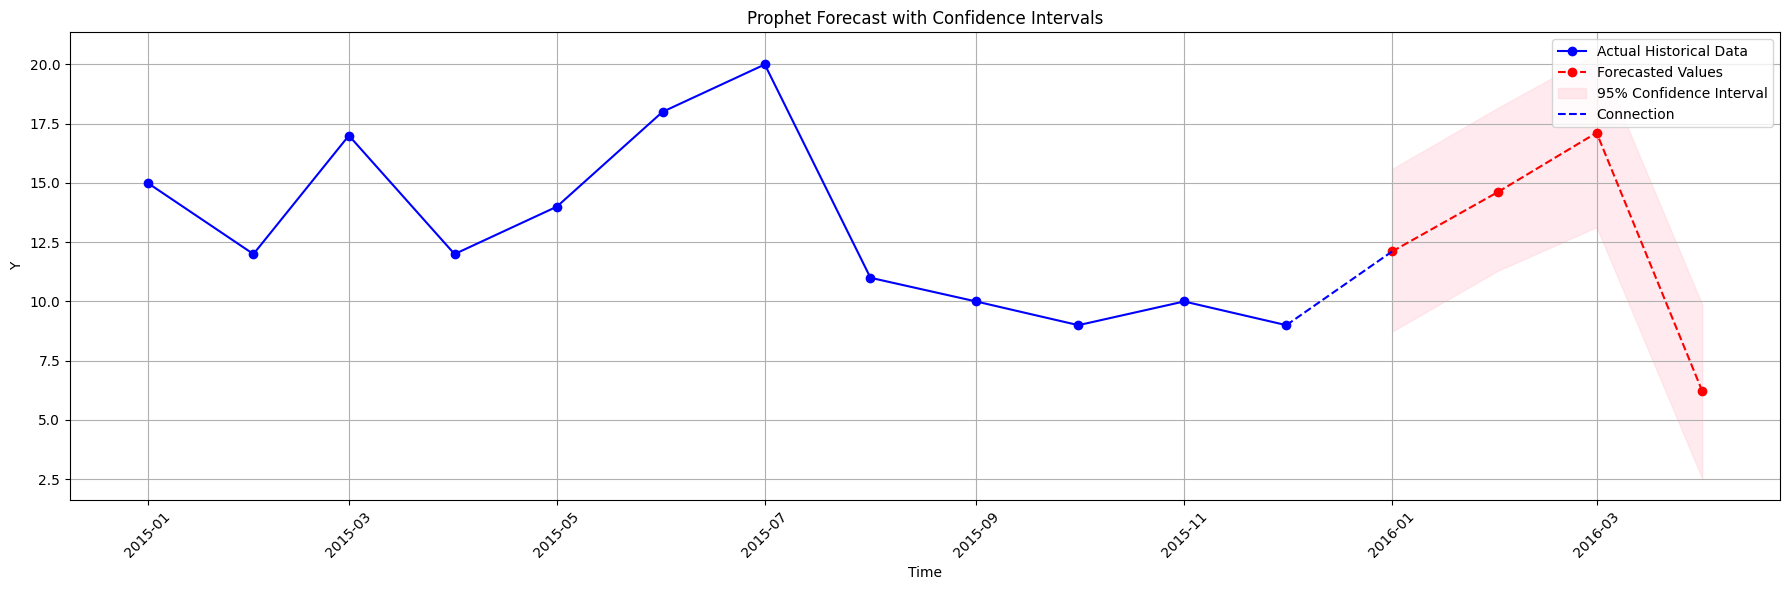

In [10]:
import pandas as pd
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt

# Define your data
data = {
    'Time': ['Jan-2015', 'Feb-2015', 'Mar-2015', 'Apr-2015', 'May-2015', 'Jun-2015', 'Jul-2015', 'Aug-2015',
             'Sep-2015', 'Oct-2015', 'Nov-2015', 'Dec-2015', 'Jan-2016', 'Feb-2016', 'Mar-2016', 'Apr-2016'],
    'Y': [15, 12, 17, 12, 14, 18, 20, 11, 10, 9, 10, 9, None, None, None, None],
    'X': [1800, 1000, 1800, 1500, 1100, 1800, 1700, 1200, 1000, 900, 1000, 900, 1200, 1500, 1800, 500]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Forward fill missing values in 'Y'
df['Y'] = df['Y'].fillna(method='ffill')

# Correctly parse 'Time' to datetime format (Month-Year)
df['Time'] = pd.to_datetime(df['Time'], format='%b-%Y', errors='coerce')

# Prepare data for Prophet
prophet_data = df.rename(columns={'Time': 'ds', 'Y': 'y'})

# Separate historical and future data
historical = prophet_data[prophet_data['ds'] < '2016-01-01']
future = prophet_data[prophet_data['ds'] >= '2016-01-01'].copy()

# Initialize Prophet model with uncertainty intervals (95% by default)
model = Prophet(interval_width=0.95)

# Add regressor (exogenous variable)
model.add_regressor('X')

# Fit the model using historical data
model.fit(historical)

# Create future dates for forecasting
future_dates = future.drop(columns=['y'])  # Drop 'y' to avoid 'ValueError: Found columns without data but no columns expected'
future_forecast = model.predict(future_dates)

# Extract forecasted values (yhat) and uncertainty intervals (yhat_lower, yhat_upper) for the future
forecasted_values = future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecasted_values.rename(columns={'yhat': 'Y_hat', 'yhat_lower': 'Lower_CI', 'yhat_upper': 'Upper_CI'}, inplace=True)

# Calculate one-step ahead forecast errors (hat_e)
forecasted_values['Y'] = future['y'].values  # Actual values (Y)
forecasted_values['hat_e'] = forecasted_values['Y'] - forecasted_values['Y_hat']  # Forecast errors (hat_e)

# Plotting actual historical data, forecasted values, and uncertainty intervals
plt.figure(figsize=(18, 6))

# Plot actual historical data
plt.plot(historical['ds'], historical['y'], marker='o', linestyle='-', color='b', label='Actual Historical Data')

# Plot forecasted values
plt.plot(forecasted_values['ds'], forecasted_values['Y_hat'], marker='o', linestyle='--', color='r', label='Forecasted Values')

# Plot uncertainty intervals
plt.fill_between(forecasted_values['ds'], forecasted_values['Lower_CI'], forecasted_values['Upper_CI'], color='pink', alpha=0.3, label='95% Confidence Interval')

# Connect the last known actual point with the first forecasted value (blue line)
plt.plot([historical['ds'].iloc[-1], future_forecast['ds'].iloc[0]],
         [historical['y'].iloc[-1], future_forecast['yhat'].iloc[0]],
         linestyle='--', color='b', label='Connection')

plt.title('Prophet Forecast with Confidence Intervals')
plt.xlabel('Time')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# Create a summary table
summary_table = pd.DataFrame({
    'Time': forecasted_values['ds'],
    'Actuals (Y)': forecasted_values['Y'],
    'Predicted (Y_hat)': forecasted_values['Y_hat'],
    'Lower CI': forecasted_values['Lower_CI'],
    'Upper CI': forecasted_values['Upper_CI'],
    'Forecast Errors (hat_e)': forecasted_values['hat_e']
})

# Format summary table as a pretty table using tabulate
table = tabulate(summary_table, headers='keys', tablefmt='pretty')

# Display the summary table
print("\nSummary Table:")
print(table)



Summary Table:
+---+---------------------+-------------+--------------------+--------------------+--------------------+-------------------------+
|   |        Time         | Actuals (Y) | Predicted (Y_hat)  |      Lower CI      |      Upper CI      | Forecast Errors (hat_e) |
+---+---------------------+-------------+--------------------+--------------------+--------------------+-------------------------+
| 0 | 2016-01-01 00:00:00 |     9.0     | 12.108555726681542 | 8.735814886046107  | 15.66045883635975  |   -3.1085557266815425   |
| 1 | 2016-02-01 00:00:00 |     9.0     | 14.613138782190212 | 10.852309182460035 | 17.952265694033837 |   -5.613138782190212    |
| 2 | 2016-03-01 00:00:00 |     9.0     | 17.118332009642273 | 13.740922872200967 | 20.499350476496915 |   -8.118332009642273    |
| 3 | 2016-04-01 00:00:00 |     9.0     | 6.214697888451345  | 2.803556147005046  | 9.835916479867036  |   2.7853021115486554    |
+---+---------------------+-------------+--------------------+-----

In [11]:
import pandas as pd
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

# Define your data
data = {
    'Time': ['Jan-2015', 'Feb-2015', 'Mar-2015', 'Apr-2015', 'May-2015', 'Jun-2015', 'Jul-2015', 'Aug-2015',
             'Sep-2015', 'Oct-2015', 'Nov-2015', 'Dec-2015', 'Jan-2016', 'Feb-2016', 'Mar-2016', 'Apr-2016'],
    'Y': [15, 12, 17, 12, 14, 18, 20, 11, 10, 9, 10, 9, None, None, None, None],
    'X': [1800, 1000, 1800, 1500, 1100, 1800, 1700, 1200, 1000, 900, 1000, 900, 1200, 1500, 1800, 500]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Forward fill missing values in 'Y'
df['Y'] = df['Y'].fillna(method='ffill')

# Correctly parse 'Time' to datetime format (Month-Year)
df['Time'] = pd.to_datetime(df['Time'], format='%b-%Y', errors='coerce')

# Prepare data for Prophet
prophet_data = df.rename(columns={'Time': 'ds', 'Y': 'y'})

# Separate historical and future data
historical = prophet_data[prophet_data['ds'] < '2016-01-01']
future = prophet_data[prophet_data['ds'] >= '2016-01-01'].copy()

# Initialize Prophet model with uncertainty intervals (95% by default)
model = Prophet(interval_width=0.95)

# Add regressor (exogenous variable)
model.add_regressor('X')

# Fit the model using historical data
model.fit(historical)

# Create future dates for forecasting
future_dates = future.drop(columns=['y'])  # Drop 'y' to avoid 'ValueError: Found columns without data but no columns expected'
future_forecast = model.predict(future_dates)

# Extract forecasted values (yhat) and uncertainty intervals (yhat_lower, yhat_upper) for the future
forecasted_values = future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecasted_values.rename(columns={'yhat': 'Y_hat', 'yhat_lower': 'Lower_CI', 'yhat_upper': 'Upper_CI'}, inplace=True)

# Calculate one-step ahead forecast errors (hat_e)
forecasted_values['Y'] = future['y'].values  # Actual values (Y)
forecasted_values['hat_e'] = forecasted_values['Y'] - forecasted_values['Y_hat']  # Forecast errors (hat_e)

# Initialize variables for calculating êt+1
alpha = 0.112  # Autoregressive coefficient
theta = 0.20   # Coefficient for zero-mean Gaussian noise
et = historical['y'].values[-1]  # Last known historical error term (e_T)

# Calculate êt+1 for each forecasted period
forecasted_values['et+1'] = np.nan  # Initialize êt+1 column

for i in range(len(forecasted_values)):
    et_plus_1 = alpha * et  # Autoregressive component
    forecasted_values.at[i, 'et+1'] = et_plus_1
    et = et_plus_1  # Update et for the next period

# Display the forecasted values with êt+1
print("\nForecasted values (Y_hat) and one-step ahead forecast errors (hat_e) for the future:")
print(forecasted_values[['ds', 'Y_hat', 'Y', 'hat_e', 'et+1']])

# Format summary table as a pretty table using tabulate
table = tabulate(forecasted_values[['ds', 'Y_hat', 'Y', 'hat_e', 'et+1']], headers='keys', tablefmt='pretty')

# Display the summary table
print("\nSummary Table:")
print(table)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2_wddkxc/hehl4gy0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2_wddkxc/a6g8s3f0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64107', 'data', 'file=/tmp/tmp2_wddkxc/hehl4gy0.json', 'init=/tmp/tmp2_wddkxc/a6g8s3f0.json', 'output', 'file=/tmp/tmp2_wddkxc/prophet_modelxdlmyq4t/prophet_model-20240715044944.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:49:44 - cmdstanpy - INFO - Chain [1] start processing
IN


Forecasted values (Y_hat) and one-step ahead forecast errors (hat_e) for the future:
          ds      Y_hat    Y     hat_e      et+1
0 2016-01-01  12.108556  9.0 -3.108556  1.008000
1 2016-02-01  14.613139  9.0 -5.613139  0.112896
2 2016-03-01  17.118332  9.0 -8.118332  0.012644
3 2016-04-01   6.214698  9.0  2.785302  0.001416

Summary Table:
+---+---------------------+--------------------+-----+---------------------+----------------+
|   |         ds          |       Y_hat        |  Y  |        hat_e        |      et+1      |
+---+---------------------+--------------------+-----+---------------------+----------------+
| 0 | 2016-01-01 00:00:00 | 12.108555726681542 | 9.0 | -3.1085557266815425 |     1.008      |
| 1 | 2016-02-01 00:00:00 | 14.613138782190212 | 9.0 | -5.613138782190212  |    0.112896    |
| 2 | 2016-03-01 00:00:00 | 17.118332009642273 | 9.0 | -8.118332009642273  |  0.012644352   |
| 3 | 2016-04-01 00:00:00 | 6.214697888451345  | 9.0 | 2.7853021115486554  | 0.0014161674

In [12]:
import pandas as pd
from prophet import Prophet
import numpy as np
from tabulate import tabulate

# Define your data
data = {
    'Date': ['Q12015', 'Q22015', 'Q32015', 'Q42015', 'Q12016', 'Q22016', 'Q32016', 'Q42016', 'Q12017', 'Q22017',
             'Q32017', 'Q42017', 'Q12018', 'Q22018', 'Q32018', 'Q42018'],
    'Time': ['Jan-2015', 'Feb-2015', 'Mar-2015', 'Apr-2015', 'May-2015', 'Jun-2015', 'Jul-2015', 'Aug-2015',
             'Sep-2015', 'Oct-2015', 'Nov-2015', 'Dec-2015', 'Jan-2016', 'Feb-2016', 'Mar-2016', 'Apr-2016'],
    'Y': [15, 12, 17, 12, 14, 18, 20, 11, 10, 9, 10, 9, None, None, None, None],
    'X': [1800, 1000, 1800, 1500, 1100, 1800, 1700, 1200, 1000, 900, 1000, 900, 1200, 1500, 1800, 500],
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Forward fill missing values in 'Y'
df['Y'] = df['Y'].fillna(method='ffill')

# Correctly parse 'Time' to datetime format (Month-Year)
df['Time'] = pd.to_datetime(df['Time'], format='%b-%Y', errors='coerce')

# Prepare data for Prophet
prophet_data = df.rename(columns={'Time': 'ds', 'Y': 'y'})

# Separate historical and future data
historical = prophet_data[prophet_data['ds'] < '2016-01-01']
future = prophet_data[prophet_data['ds'] >= '2016-01-01'].copy()

# Initialize Prophet model with uncertainty intervals (95% by default)
model = Prophet(interval_width=0.95)

# Add regressor (exogenous variable)
model.add_regressor('X')

# Fit the model using historical data
model.fit(historical)

# Create future dates for forecasting
future_dates = future.drop(columns=['y'])  # Drop 'y' to avoid 'ValueError: Found columns without data but no columns expected'
future_forecast = model.predict(future_dates)

# Extract forecasted values (yhat) and uncertainty intervals (yhat_lower, yhat_upper) for the future
forecasted_values = future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecasted_values.rename(columns={'yhat': 'Yhat', 'yhat_lower': 'Lower_CI', 'yhat_upper': 'Upper_CI'}, inplace=True)

# Calculate one-step ahead forecast errors (et) and êt+1
forecasted_values['Y'] = future['y'].values  # Actual values (Y)
forecasted_values['et'] = forecasted_values['Y'] - forecasted_values['Yhat']  # Forecast errors (et)

# Initialize variables for calculating êt+1
alpha = -0.112  # Autoregressive coefficient
theta = 0.2     # Coefficient for zero-mean Gaussian noise
zt_1 = 0        # Assuming zt+1 is 0 for all periods

# Calculate êt+1 for each forecasted period
forecasted_values['et+1'] = np.nan  # Initialize êt+1 column

for i in range(len(forecasted_values)):
    if i == 0:
        et_plus_1 = alpha * forecasted_values['et'].iloc[-1] + zt_1 * theta
    else:
        et_plus_1 = alpha * forecasted_values['et+1'].iloc[i-1] + zt_1 * theta

    forecasted_values.at[i, 'et+1'] = et_plus_1

# Display the forecasted values with êt+1
print("\nForecasted values (Yhat), actuals (Y), one-step ahead forecast errors (et), and êt+1 for the future:")
print(forecasted_values[['ds', 'Y', 'Yhat', 'et', 'et+1']])

# Format summary table as a pretty table using tabulate
table = tabulate(forecasted_values[['ds', 'Y', 'Yhat', 'et', 'et+1']], headers='keys', tablefmt='pretty')

# Display the summary table
print("\nSummary Table:")
print(table)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2_wddkxc/yqz5j29i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2_wddkxc/tjfq__qj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36678', 'data', 'file=/tmp/tmp2_wddkxc/yqz5j29i.json', 'init=/tmp/tmp2_wddkxc/tjfq__qj.json', 'output', 'file=/tmp/tmp2_wddkxc/prophet_model9nzfmj4r/prophet_model-20240715045154.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:51:54 - cmdstanpy - INFO - Chain [1] start processing
IN


Forecasted values (Yhat), actuals (Y), one-step ahead forecast errors (et), and êt+1 for the future:
          ds    Y       Yhat        et      et+1
0 2016-01-01  9.0  12.108556 -3.108556 -0.311954
1 2016-02-01  9.0  14.613139 -5.613139  0.034939
2 2016-03-01  9.0  17.118332 -8.118332 -0.003913
3 2016-04-01  9.0   6.214698  2.785302  0.000438

Summary Table:
+---+---------------------+-----+--------------------+---------------------+------------------------+
|   |         ds          |  Y  |        Yhat        |         et          |          et+1          |
+---+---------------------+-----+--------------------+---------------------+------------------------+
| 0 | 2016-01-01 00:00:00 | 9.0 | 12.108555726681542 | -3.1085557266815425 |  -0.31195383649344943  |
| 1 | 2016-02-01 00:00:00 | 9.0 | 14.613138782190212 | -5.613138782190212  |  0.03493882968726634   |
| 2 | 2016-03-01 00:00:00 | 9.0 | 17.118332009642273 | -8.118332009642273  |  -0.00391314892497383  |
| 3 | 2016-04-01 00:00:00